In [73]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

flood_image = io.imread('./test_images/sentinel2/file_0_1.png')
pre_flood_image = io.imread('./test_images/sentinel2_pre_flood/file_0_1.png')

mask = io.imread('./test_images/masks/tile_0_1.png')

water_mask = mask > 128

water_pixels = flood_image[water_mask]

mean_flood_rgb = np.mean(water_pixels, axis=0)

pre_flood_mask = np.all((pre_flood_image >= mean_flood_rgb*0.7) & (pre_flood_image <= mean_flood_rgb*1.3), axis=-1)
flood_mask = np.all((flood_image >= mean_flood_rgb*0.7) & (flood_image <= mean_flood_rgb*1.3), axis=-1)
inverse_pre_flood_mask = np.logical_not(pre_flood_mask)
inverse_flood_mask = np.logical_not(flood_mask)

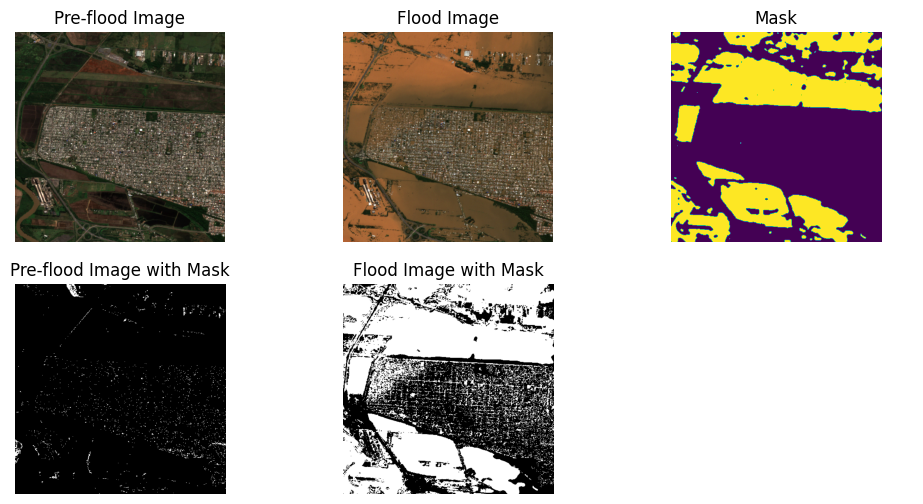

In [74]:
highlighted_pre_flood_image = np.copy(pre_flood_image)
highlighted_pre_flood_image[pre_flood_mask] = [255, 255, 255]
highlighted_pre_flood_image[inverse_pre_flood_mask] = [0, 0, 0]
highlighted_flood_image = np.copy(flood_image)
highlighted_flood_image[flood_mask] = [255, 255, 255]
highlighted_flood_image[inverse_flood_mask] = [0, 0, 0]
highlighted_flood_image[water_mask] = [255, 255, 255]

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

ax[0][0].imshow(pre_flood_image)
ax[0][0].set_title('Pre-flood Image')
ax[0][0].axis('off')

ax[0][1].imshow(flood_image)
ax[0][1].set_title('Flood Image')
ax[0][1].axis('off')

ax[0][2].imshow(mask)
ax[0][2].set_title('Mask')
ax[0][2].axis('off')

ax[1][0].imshow(highlighted_pre_flood_image)
ax[1][0].set_title('Pre-flood Image with Mask')
ax[1][0].axis('off')

ax[1][1].imshow(highlighted_flood_image)
ax[1][1].set_title('Flood Image with Mask')
ax[1][1].axis('off')

ax[1][2].axis('off')

plt.show()

In [81]:
flood_means = []
for i in range(3):
    for j in range(3):
        flood_image = io.imread(f'./test_images/sentinel2/file_{i}_{j}.png')

        mask = io.imread(f'./test_images/masks/tile_{i}_{j}.png')

        water_mask = mask > 128

        water_pixels = flood_image[water_mask]

        flood_means.append(np.mean(water_pixels, axis=0))

flood_means = np.array(flood_means)
flood_means = np.mean(flood_means, axis=0)

array([94.57423552, 65.87910033, 36.86518446])

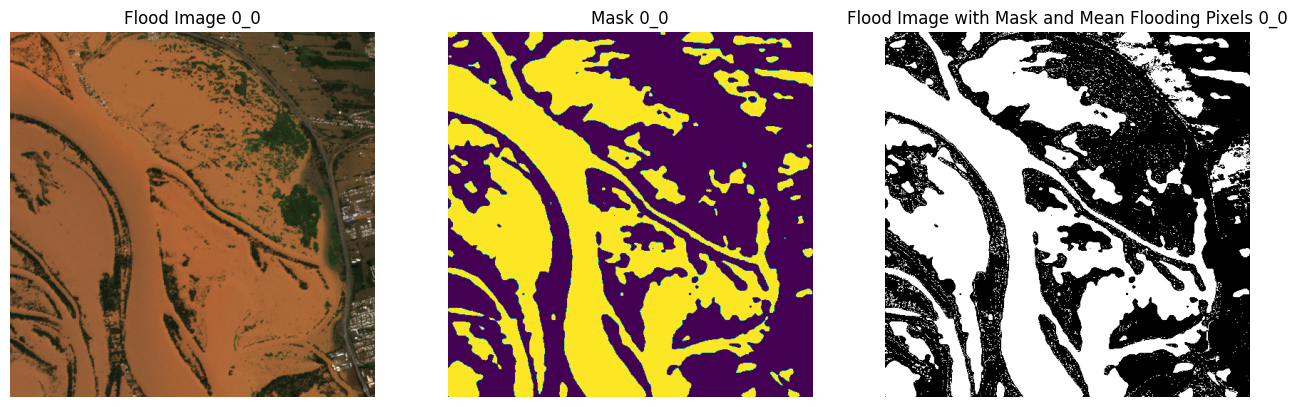

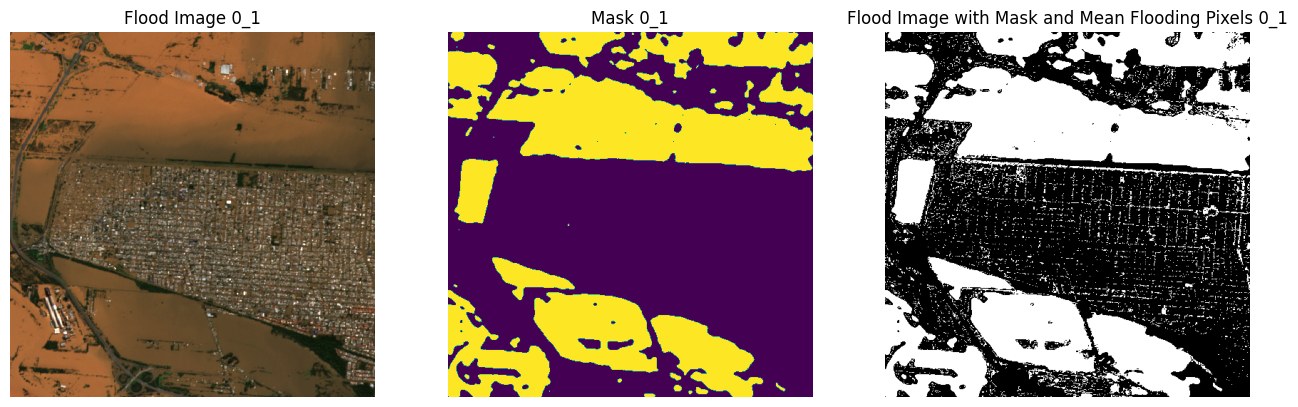

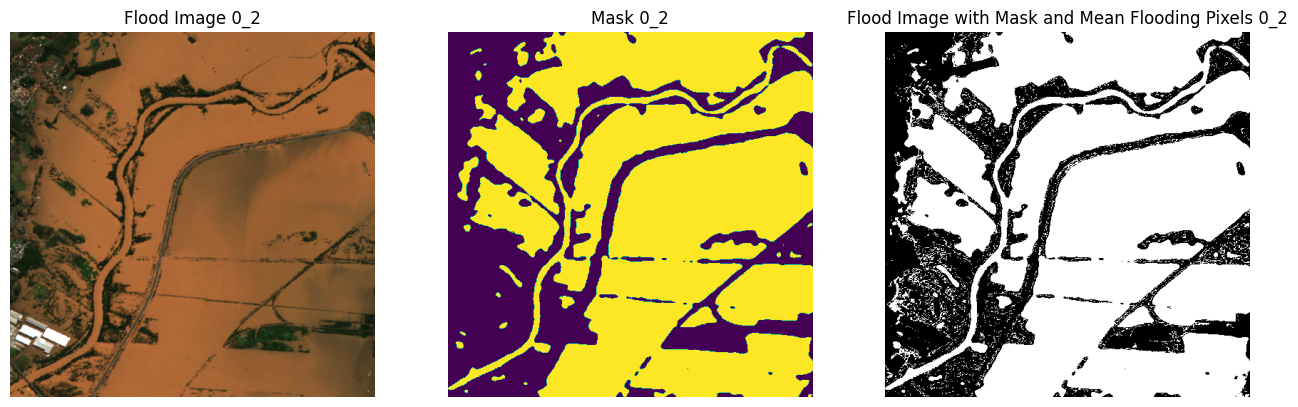

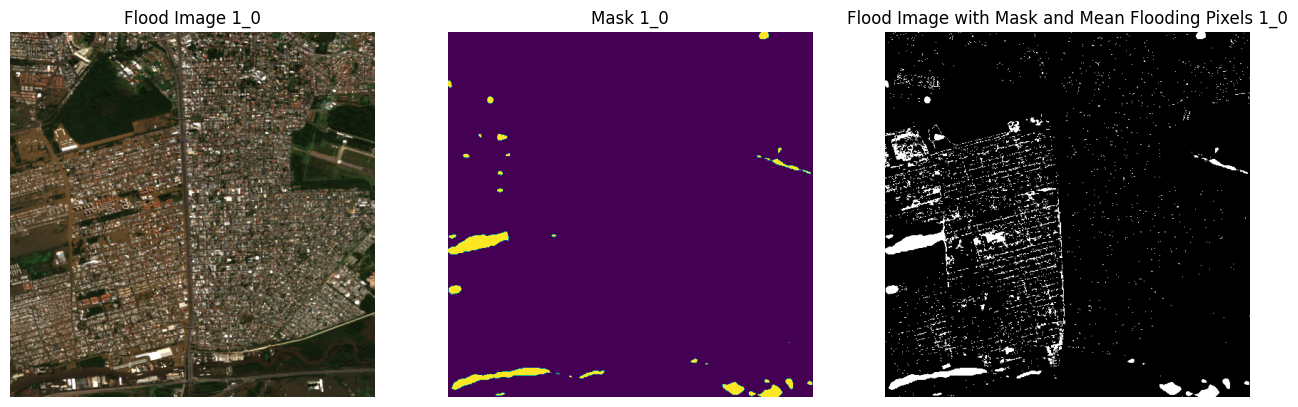

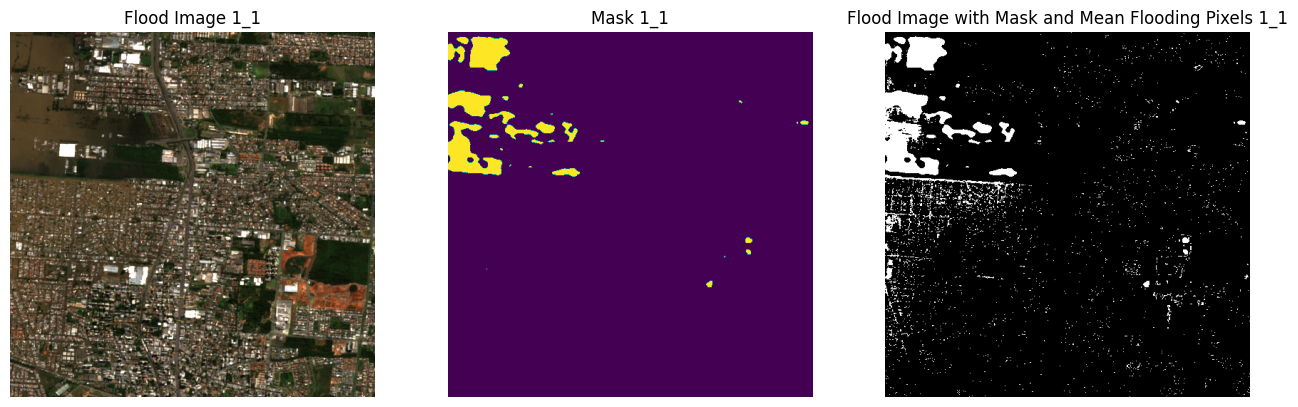

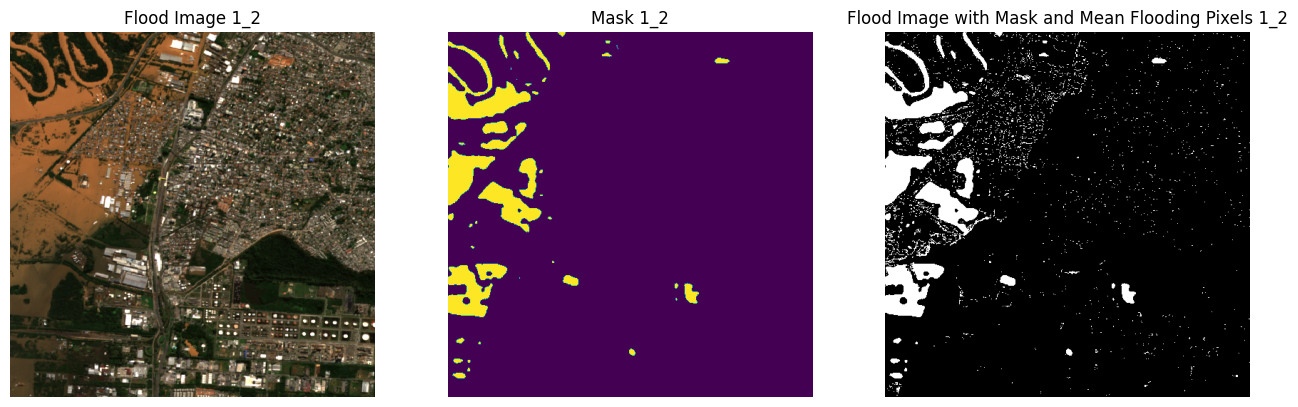

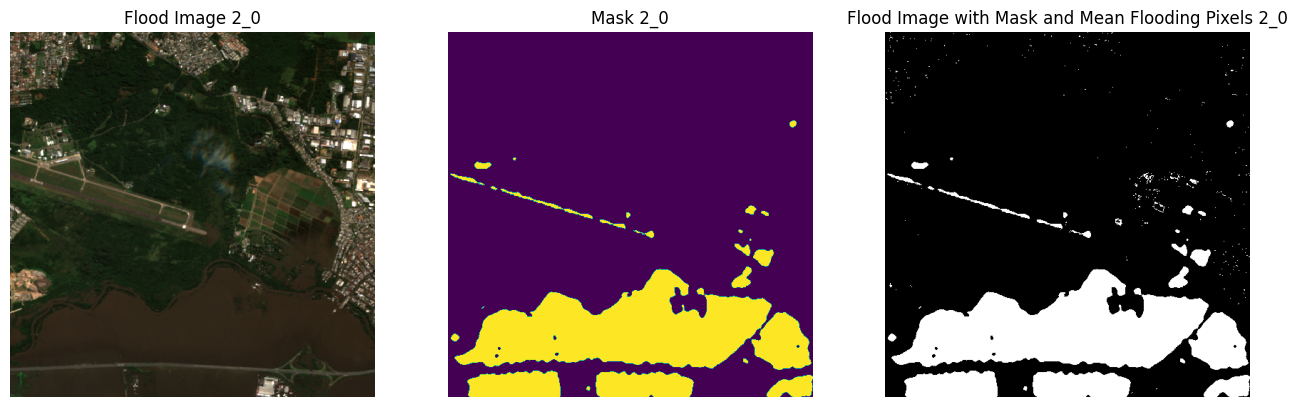

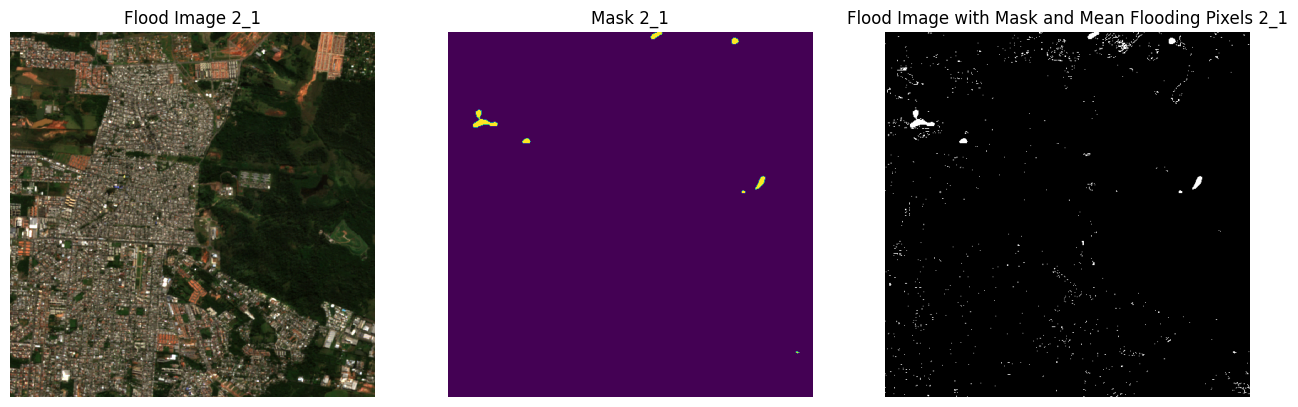

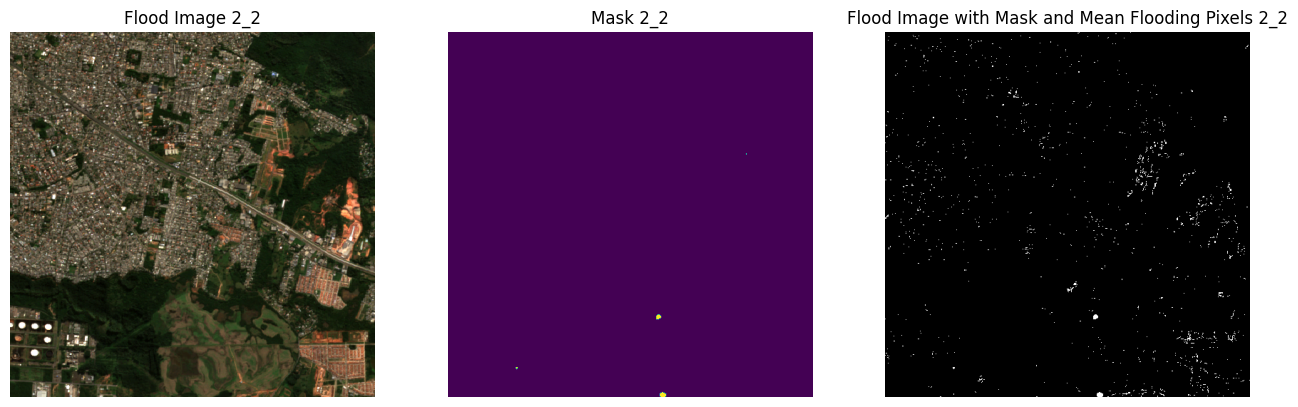

In [89]:
for i in range(3):
    for j in range(3):
        flood_image = io.imread(f'./test_images/sentinel2/file_{i}_{j}.png')
        mask = io.imread(f'./test_images/masks/tile_{i}_{j}.png')
        water_mask = mask > 128
        
        flood_mask = np.all((flood_image >= flood_means*0.85) & (flood_image <= flood_means*1.15), axis=-1)
        inverse_flood_mask = np.logical_not(flood_mask)
        highlighted_flood_image = np.copy(flood_image)
        highlighted_flood_image[flood_mask] = [255, 255, 255]
        highlighted_flood_image[inverse_flood_mask] = [0, 0, 0]
        highlighted_flood_image[water_mask] = [255, 255, 255]
        fig, ax = plt.subplots(1, 3, figsize=(16, 9))
        ax[0].imshow(flood_image)
        ax[0].set_title(f'Flood Image {i}_{j}')
        ax[0].axis('off')

        ax[1].imshow(mask)
        ax[1].set_title(f'Mask {i}_{j}')
        ax[1].axis('off')

        ax[2].imshow(highlighted_flood_image)
        ax[2].set_title(f'Flood Image with Mask and Mean Flooding Pixels {i}_{j}')
        ax[2].axis('off')
        plt.show()